<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Integrated Project (Part 2) : Tips and Tricks.

In this notebook we will learn how to undertsand our data, create and interpret visualisations in Python using Matplotlib, Seaborn and interpret and analyse our data.

Okay, first lets import the required python libraries, look at our data and see what type of data type we have

In [19]:
import pandas as pd

Lets import data from an insurance company that shows their policy prices

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/MainakRepositor/Datasets/master/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
df.shape

(1338, 7)

The folllowing data set is from an insurance company, and from the columns we can conclude that the data set is on based premiums for medical cover. Just looking at, try to ask yourself questions you would want to generally find out.

Lets analyse the data types of each column

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Lets now get some basic statistics from our numerical values

In [23]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Note:** You can save the above as a new dataframe *Example:* stats = df.describe()

Now lets try  perform  some interesting aggregations

How can we show the average charges by sex?

In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
avg_charge = df.groupby('sex')['charges'].agg('mean')
avg_charge

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

What if we want to see how many smokers we have by sex category?

In [25]:
smoker_count = df[df['smoker'] == 'yes'].groupby('sex').size()

print(smoker_count)

sex
female    115
male      159
dtype: int64


# Interpreting Data Using Visualisations

Now that we've looked at our data, we are aware of our variable's datatypes and their basic statistics. But, this isn't really enough to decide whether or not this insurance is suitable for you/client. Lets actually 'look' at our data and how it's distributed.

We are aware that we have numerical variables: age, bmi and charges. Lets use histograms to answer some of the following questions:
* Is the company age biased (Do they take younger clients than older?)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


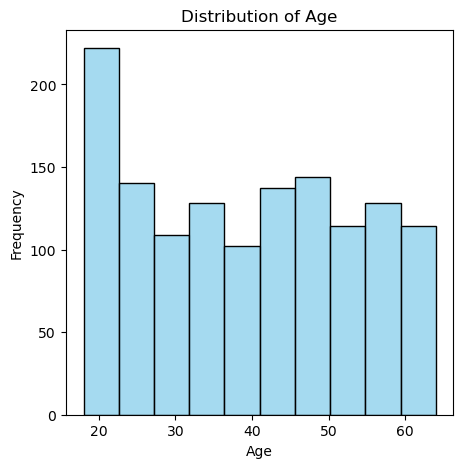

In [27]:
#Visualise Age Distribution
plt.figure(figsize=(5, 5))
sns.histplot(df['age'], bins=10, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

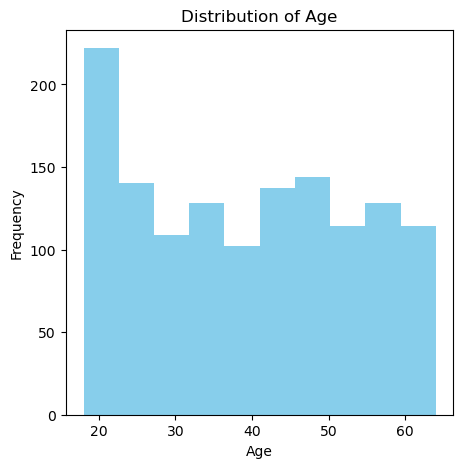

In [34]:
# Create a figure and axis
plt.figure(figsize=(5, 5))

# Plot histogram
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()


* Is the company BMI biased (Do they take clients with a lower bmi than higher bmi?)

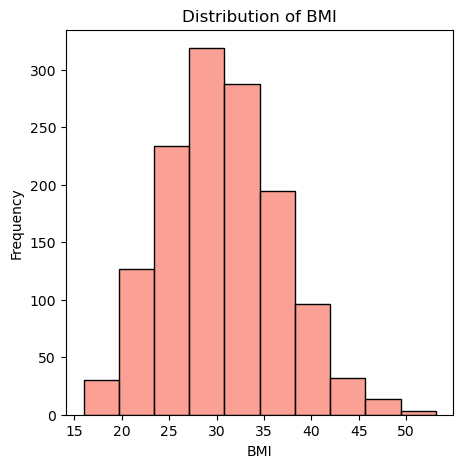

In [9]:
# Visualize BMI distribution
plt.figure(figsize=(5, 5))
sns.histplot(df['bmi'], bins=10, color='salmon')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

* How are charges distributed. (Are most of their policies high-chargerd premiums?)

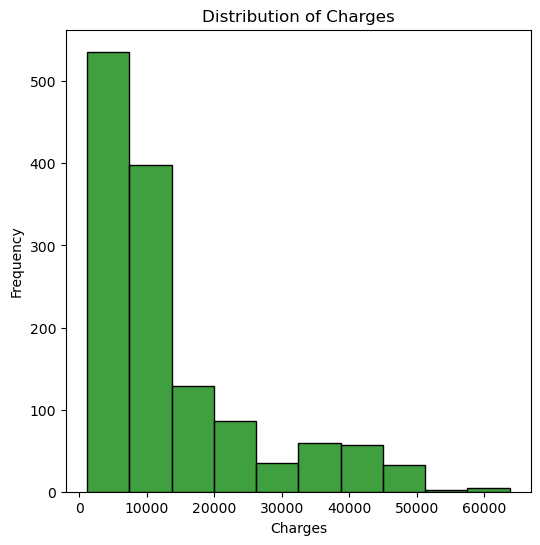

In [10]:
# Visualize charges distribution
plt.figure(figsize=(6, 6))
sns.histplot(df['charges'], bins=10, color='green')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

## KDE sub_plots of our data set and how to interpret them

The KDE plot is typically visualized as a line or curve on a graph, with the x-axis representing the range of values of the variable being analyzed and the y-axis representing the estimated probability density at each point along the x-axis.

Notice how they KDE visualisations are similar but not extact, this is because these they provide a smooth and continuous representation of the underlying distribution of the data. They help to visualize the shape, spread, and skewness of the dataset without the discrete binning that histograms often use.

Note that the height of KDE plots are much harder to interpret, and requires a good understanding of what the term Density means in this context, and is covered well in Seaborn's documentation. For now, we will be concentrating on the x-axis to draw up conclusions about our data set.

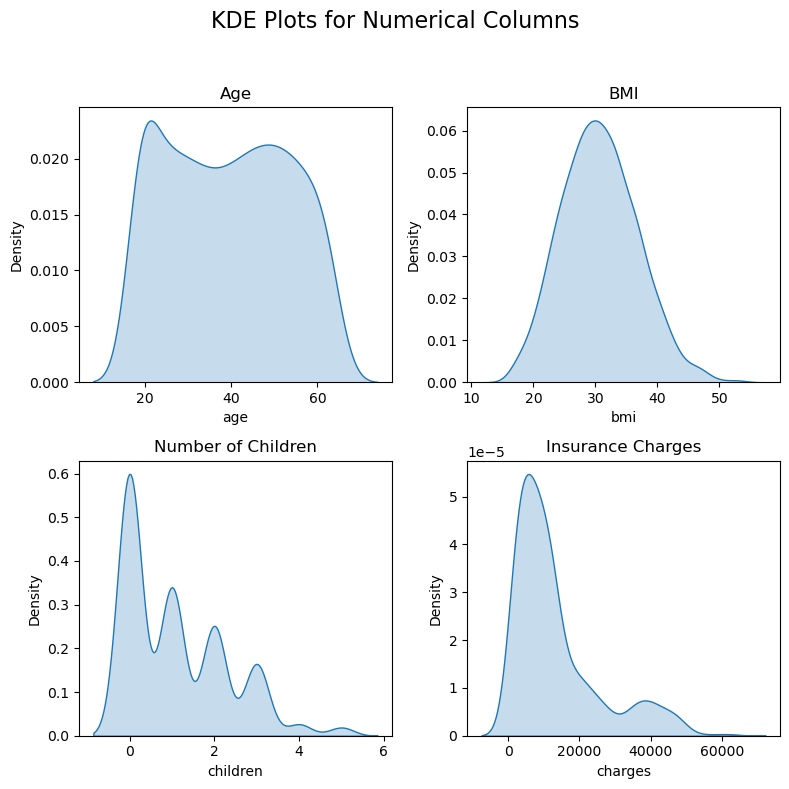

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle('KDE Plots for Numerical Columns', fontsize=16)

## {[0,0]  [0, 1]
##  [1,0]  [1,1] }

# Plot KDE for Age
sns.kdeplot(data=df, x='age', ax=axes[0, 0], fill = True)
axes[0, 0].set_title('Age')

# Plot KDE for BMI
sns.kdeplot(data=df, x='bmi', ax=axes[0, 1], fill = True)
axes[0, 1].set_title('BMI')

# Plot KDE for Number of Children
sns.kdeplot(data=df, x='children', ax=axes[1, 0], fill = True)
axes[1, 0].set_title('Number of Children')

# Plot KDE for Medical Insurance Charges
sns.kdeplot(data=df, x='charges', ax=axes[1, 1], fill = True)
axes[1, 1].set_title('Insurance Charges')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Correlation

Correlation is a statistical measure that describes the strength and direction of a linear relationship between two variables.

Strength of Relationship: Correlation coefficients range from -1 to +1, where:

+1 indicates a perfect positive correlation: as one variable increases, the other variable increases proportionally.

-1 indicates a perfect negative correlation: as one variable increases, the other variable decreases proportionally.

0 indicates no correlation: changes in one variable are not associated with changes in the other variable.



In [13]:
corr_matrix = df.corr(numeric_only = True)
corr_matrix

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Lets create a visualisation to show the strength of the linear relationships between each numerical variable. Lets use a heatmap.

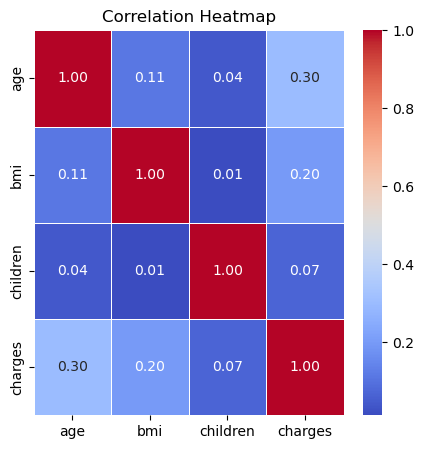

In [14]:
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

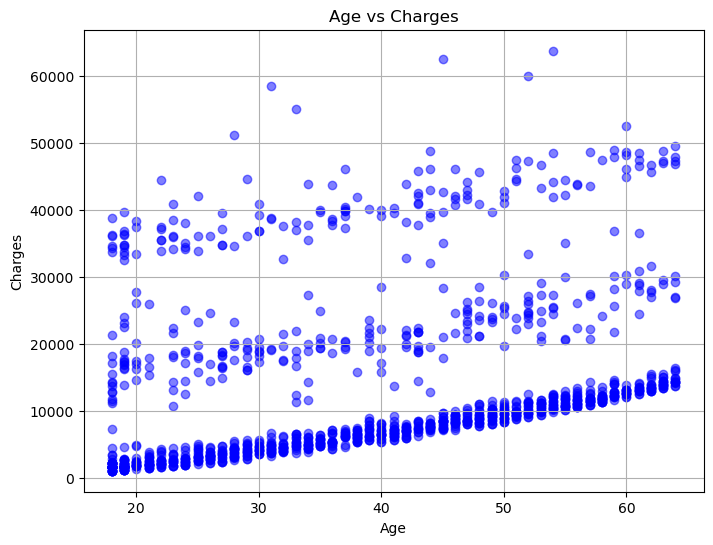

In [15]:
#The relationship may not be linear but there is some relation.
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['charges'], color='blue', alpha=0.5)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()


## Continuous Relationships

## Categorial Variables

Up until now we've only done analysis on our numerical variables, but haven't touched on our categorail variabls such as sex and smoker. We do have questions we can answer based on these variables such as:

* Is the company gender biased
* Do smokers pay more charges than non-smokers

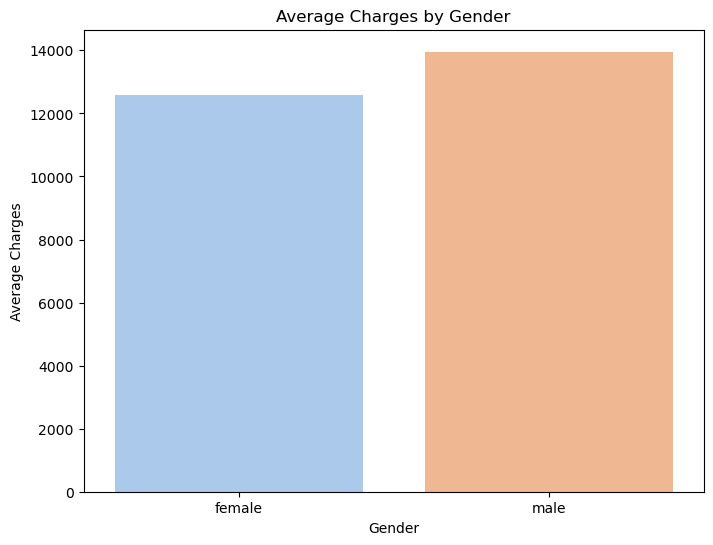

In [31]:
gender_charges = df.groupby('sex')['charges'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='charges', data=gender_charges, palette='pastel')
plt.title('Average Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Charges')
plt.show()

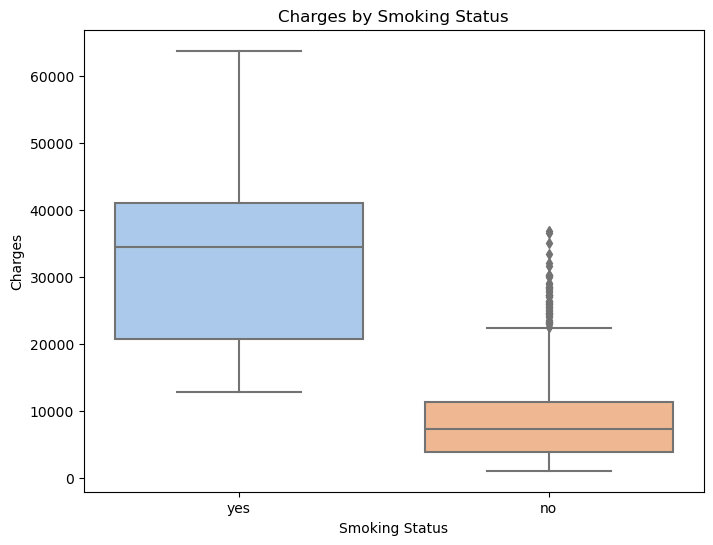

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df, palette='pastel')
plt.title('Charges by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Charges')
plt.show()

## Pairplots

Paiplots allows you to visualize pairwise relationships between different variables in a dataset. So lets use this visualisations to visualise if there is any bias in chargers per gender,or any relation to BMI and gender

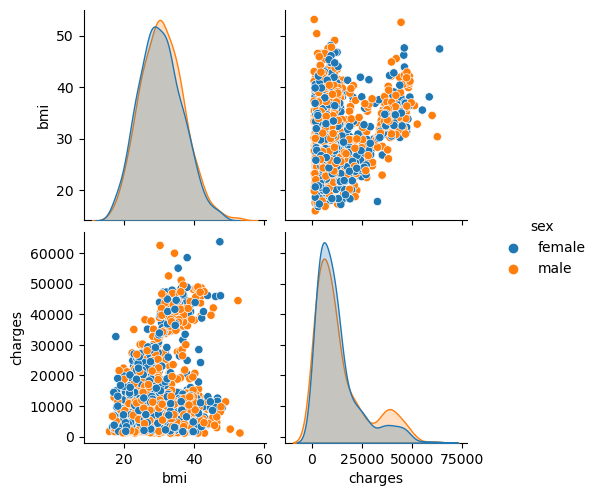

In [16]:
remove_columns =['children','region','age','smoker']

sns.pairplot(df.drop(columns =remove_columns), hue="sex")

# Tips

* Make sure to read insrtuctions
* Read through the notes provided in the notebook
* understand your data 
* Enjoy!

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>